<a href="https://colab.research.google.com/github/deelilah/Hypothesis-Testing/blob/master/Moringa_Data_Science_Core_IP_Week4_2019_12_Rose_Delilah_Gesicho_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autolib Electric Car Analysis

Problem Statement

To investigate if electric cars are used more on weekdays compared to on weekends.

Null Hypothesis: If Bluecars taken on weekends are more compared to weekdays then this study(problem statement) is True.

Alternate Hypothesis: If Bluecars taken on weekends are less compared to weekdays then this study(problem statement) is False.

Determined by a metric of success
If the null hypothesis is true then our study is correct.

Context

Work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, i need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

Dataset provided http://bit.ly/DSCoreAutolibDataset
It contains 16085 rows and 13 columns


In [0]:
#importing the pyhon libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
# importing stats
from scipy.stats import ttest_ind
# importing math
import math
# importing pandas profiling
import pandas_profiling as pp


In [188]:
#load the dataset
data=pd.read_csv("autolib_daily_events_postal_code.csv")
d1.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [190]:
#Data cleaning
#validity
#stripping all the spaces in our column names
data.columns.str.strip()

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [0]:
#rename columns to meet the naming rule 
data.rename(columns = {'Postal code':'postal_code'}, inplace = True) 
data.rename(columns = {'dayOfWeek':'day_of_week'}, inplace = True) 


In [184]:
#confirmation of the column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [0]:
# to change integers to string use .astype() .We do this to prevent calculating postal codes and the rest of the const string numbers as integers
data['postal_code'] = data.postal_code.astype(str)
data['n_daily_data_points'] = data.n_daily_data_points.astype(str)
data['day_of_week'] = data.day_of_week.astype(str)

In [251]:
#check the data types if they are of right unit
data.dtypes

postal_code               object
date                      object
n_daily_data_points       object
day_of_week               object
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [252]:
#check the columns and rows of the dataset
data.shape

(16085, 13)

In [267]:
print(data.BlueCars_taken_sum.mean())

125.92695057506994


In [192]:
# overview of the dataset using pandas profiling
# 
pp.ProfileReport(data)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


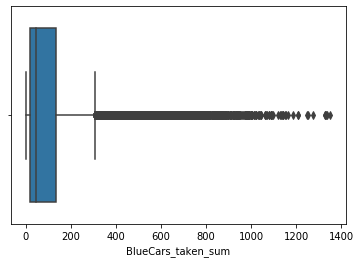

In [111]:

#check for outliers using boxplot
sns.boxplot(x=data['BlueCars_taken_sum'])

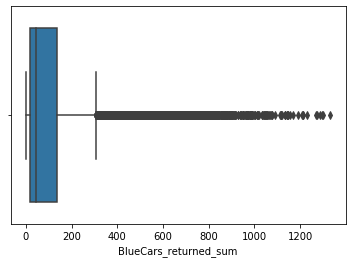

In [112]:
sns.boxplot(x=data['BlueCars_returned_sum'])

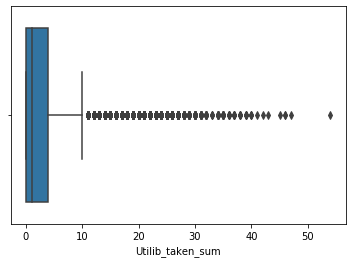

In [113]:
sns.boxplot(x=data['Utilib_taken_sum'])

In [114]:
#check for outliers of all using IQR to collect all the outliers at once.

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

BlueCars_taken_sum        115.0
BlueCars_returned_sum     115.0
Utilib_taken_sum            4.0
Utilib_returned_sum         4.0
Utilib_14_taken_sum         9.0
Utilib_14_returned_sum      9.0
Slots_freed_sum             5.0
Slots_taken_sum             5.0
dtype: float64


In [115]:

print((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR)))

       BlueCars_returned_sum  ...  postal_code
0                      False  ...        False
1                      False  ...        False
2                      False  ...        False
3                      False  ...        False
4                      False  ...        False
...                      ...  ...          ...
16080                  False  ...        False
16081                  False  ...        False
16082                  False  ...        False
16083                  False  ...        False
16084                  False  ...        False

[16085 rows x 13 columns]


In [227]:
data.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
day_of_week               0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [0]:
#null values significance
#did not drop any null values because there were none
# 0 is not a null value 

In [229]:
data1=data.drop_duplicates
data1
#no duplicated data

<bound method DataFrame.drop_duplicates of        postal_code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]>

In [235]:
#put the dates in the right order
data['date'].replace('-', '/')
print(data)

       postal_code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]


Central Frequency


In [236]:
print(data.BlueCars_taken_sum.mean())

125.92695057506994


In [237]:
print(data.BlueCars_taken_sum.std())

185.42657876727893


In [238]:
print(data.BlueCars_returned_sum.mean())

125.912713708424


In [239]:
print(data.BlueCars_taken_sum.std())

185.42657876727893


In [240]:
data.mean()

postal_code               88791.293876
n_daily_data_points        1431.330619
day_of_week                   2.969599
BlueCars_taken_sum          125.926951
BlueCars_returned_sum       125.912714
Utilib_taken_sum              3.698290
Utilib_returned_sum           3.699099
Utilib_14_taken_sum           8.600560
Utilib_14_returned_sum        8.599192
Slots_freed_sum              22.629033
Slots_taken_sum              22.629282
dtype: float64

In [241]:
data.std()

postal_code               7647.342000
n_daily_data_points         33.212050
day_of_week                  2.008378
BlueCars_taken_sum         185.426579
BlueCars_returned_sum      185.501535
Utilib_taken_sum             5.815058
Utilib_returned_sum          5.824634
Utilib_14_taken_sum         12.870098
Utilib_14_returned_sum      12.868993
Slots_freed_sum             52.120263
Slots_taken_sum             52.146030
dtype: float64

Univariate


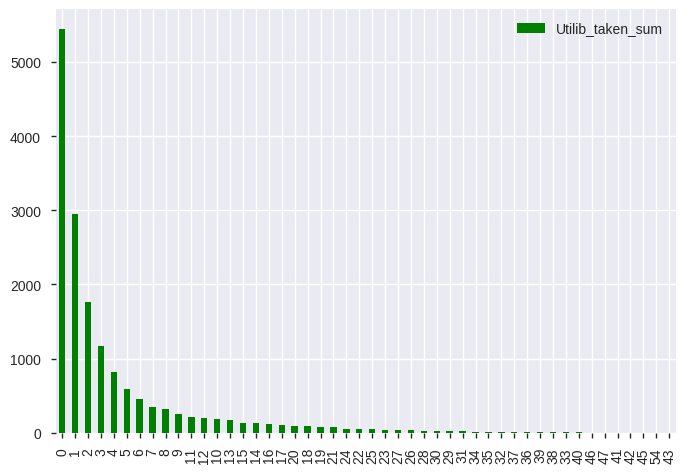

In [242]:
d2=pd.DataFrame(data.Utilib_taken_sum.value_counts())
d2.plot(kind='bar',color='green')




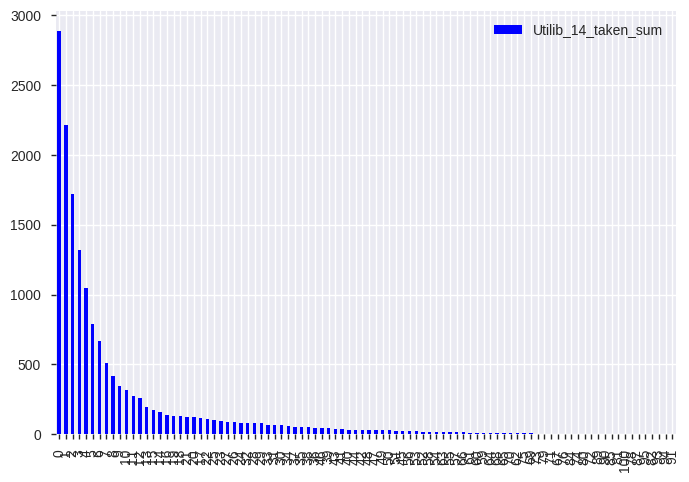

In [243]:
d2=pd.DataFrame(data.Utilib_14_taken_sum.value_counts())
d2.plot(kind='bar',color='blue')

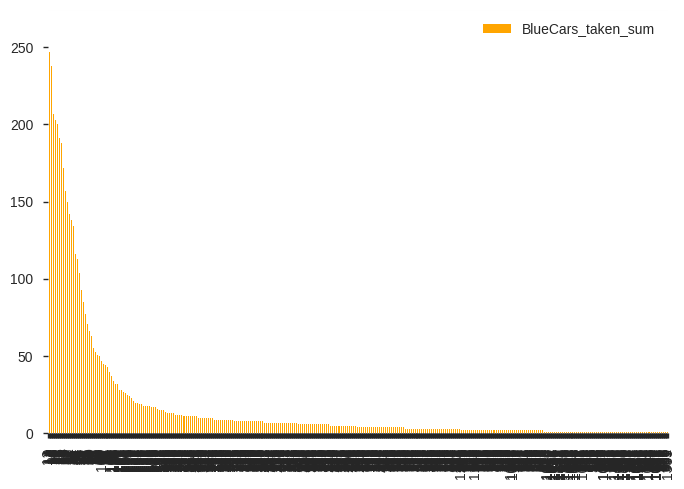

In [245]:

d2=pd.DataFrame(data.BlueCars_taken_sum.value_counts())
d2.plot(kind='bar',color='orange')

BIVARIATE

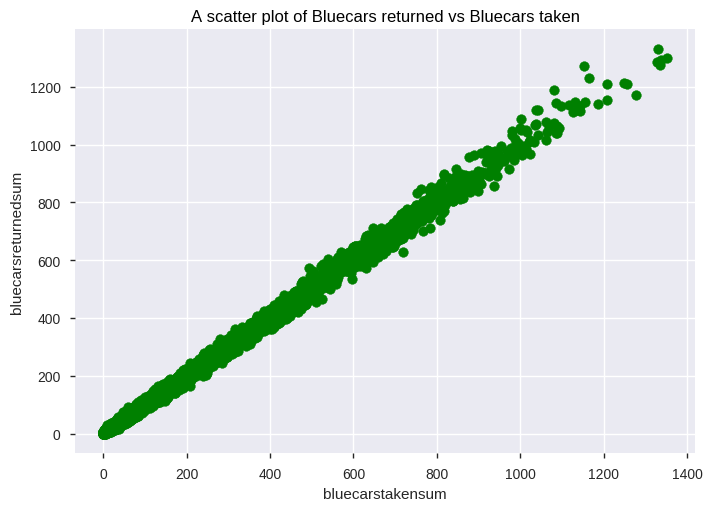

In [247]:

plt.scatter(data['BlueCars_taken_sum'], data['BlueCars_returned_sum'], color = 'green')
plt.title('A scatter plot of Bluecars returned vs Bluecars taken', color = 'black')
plt.xlabel('bluecarstakensum')
plt.ylabel('bluecarsreturnedsum')
plt.show()

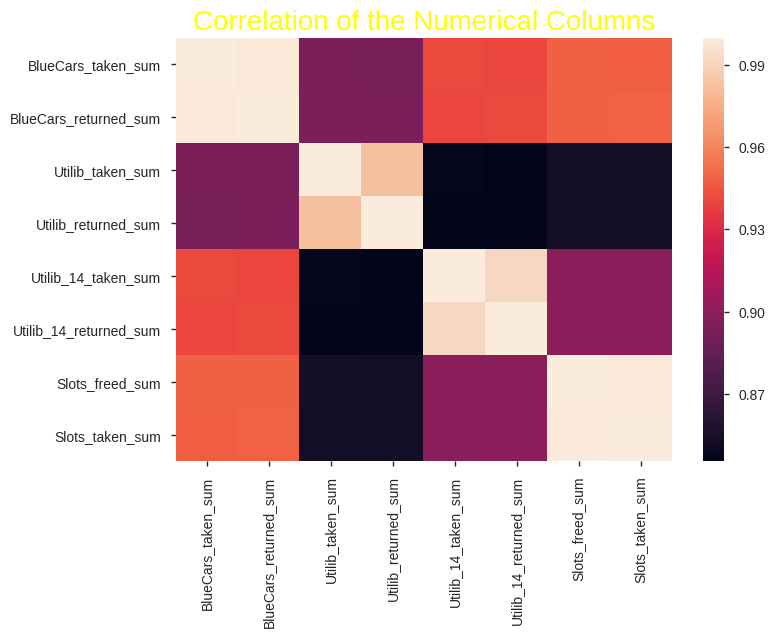

In [253]:
#showing correlation between variables
coeff = data.corr()

plt.figure()
sns.heatmap(coeff, xticklabels=coeff.columns, yticklabels=coeff.columns)
plt.title('Correlation of the Numerical Columns', color = 'yellow', fontsize = 20)
plt.show()

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
postal_code               16085 non-null object
date                      16085 non-null object
n_daily_data_points       16085 non-null object
day_of_week               16085 non-null object
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(8), object(5)
memory usage: 1.6+ MB




```

```

HYPOTHESIS TESTING

Here we try to prove if our null hypothesis is true as stated in hypothesis testing which is the use of statistics to determine the probability that a given hypothesis is true.


In [256]:
# Taking a sample from the autolib using stratified method
df_sample = data.sample(n=1600,replace='False')
print(df_sample)

      postal_code       date  ... Slots_freed_sum Slots_taken_sum
10220       93110  4/11/2018  ...               0               0
2608        75017  4/26/2018  ...             188             189
10176       93110  2/23/2018  ...               0               0
4841        92120   1/9/2018  ...               0               0
8351        92360  4/11/2018  ...               0               0
...           ...        ...  ...             ...             ...
1086        75007  6/14/2018  ...             126             131
16054       95880  5/20/2018  ...               0               0
15686       95100  3/14/2018  ...               0               0
7084        92270  3/12/2018  ...               0               0
14583       94300   3/2/2018  ...               0               0

[1600 rows x 13 columns]


In [257]:

print(df_sample.BlueCars_taken_sum.mean())


122.864375


In [258]:
df_sample.std()

BlueCars_taken_sum        182.539503
BlueCars_returned_sum     182.091072
Utilib_taken_sum            5.811842
Utilib_returned_sum         5.763028
Utilib_14_taken_sum        13.127248
Utilib_14_returned_sum     13.129651
Slots_freed_sum            51.674248
Slots_taken_sum            51.440369
dtype: float64

We are interested in comparing  weekdays and weekends bluecar sharing mean.

In [259]:
#taken on weekend

data2=df_sample[(df_sample.day_type == 'weekend')]
data2

,postal_code,date,n_daily_data_points,day_of_week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
8112,92350,1/13/2018,1440,5,weekend,38,40,2,2,3,2,0,0
196,75002,2/10/2018,1440,5,weekend,259,257,4,4,14,14,44,45
12720,93700,3/10/2018,1440,5,weekend,63,60,7,9,5,2,21,22
7206,92290,2/3/2018,1438,5,weekend,35,37,0,0,0,0,0,0
969,75007,2/3/2018,1438,5,weekend,411,401,3,2,14,15,121,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800,92700,6/9/2018,1440,5,weekend,167,153,8,9,12,12,0,0
13535,94120,4/15/2018,1439,6,weekend,65,68,1,2,3,4,0,0
14998,94450,1/6/2018,1437,5,weekend,16,19,0,0,1,1,0,0
6607,92240,3/3/2018,1440,5,weekend,102,102,2,4,10,9,0,0


In [266]:
#weekend bluecars taken mean
print(df_sample.BlueCars_taken_sum.mean())

122.864375


In [265]:
#weekend bluecars taken std
print(df_sample.BlueCars_taken_sum.std())

182.53950298415663


In [269]:
data2.describe()

,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000
mean,128.716590,129.806452,3.665899,3.635945,8.891705,8.898618,20.974654,20.997696
std,195.235904,195.813526,5.852410,5.804052,14.082396,14.037029,53.876317,53.696973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,22.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,54.500000,55.000000,1.000000,1.000000,4.000000,4.000000,0.000000,0.000000
75%,120.750000,127.250000,4.000000,4.000000,10.000000,10.000000,4.000000,4.750000
max,1335.000000,1276.000000,37.000000,36.000000,100.000000,89.000000,339.000000,336.000000


In [270]:
#select weekday
data3=df_sample[(df_sample.day_type == 'weekday')]
data3

,postal_code,date,n_daily_data_points,day_of_week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
10220,93110,4/11/2018,1439,2,weekday,35,31,0,1,3,4,0,0
2608,75017,4/26/2018,1440,3,weekday,706,704,25,22,48,50,188,189
10176,93110,2/23/2018,1440,4,weekday,28,32,1,1,3,3,0,0
4841,92120,1/9/2018,1439,1,weekday,70,66,3,1,5,3,0,0
8351,92360,4/11/2018,1439,2,weekday,17,17,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,75006,1/18/2018,1439,3,weekday,256,250,11,10,18,16,57,54
1086,75007,6/14/2018,1439,3,weekday,280,304,9,10,23,23,126,131
15686,95100,3/14/2018,1440,2,weekday,38,39,0,0,13,11,0,0
7084,92270,3/12/2018,1440,0,weekday,29,28,0,0,1,2,0,0


In [271]:
data3.describe()

,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,120.686106,120.339623,3.605489,3.591767,8.538593,8.488851,22.715266,22.612350
std,177.620585,176.731069,5.799106,5.750139,12.758495,12.779992,50.845938,50.591444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,41.000000,41.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,135.500000,133.000000,4.000000,4.000000,10.000000,9.000000,6.000000,6.000000
max,973.000000,970.000000,38.000000,36.000000,79.000000,85.000000,285.000000,292.000000


In [272]:
print(data3.BlueCars_taken_sum.mean())

120.68610634648371


In [273]:
print(data3.BlueCars_taken_sum.std())

177.62058496033197


In [0]:
#assumption.
#having looked at this we can already tell our hypothesis may be true.

Apparently my hypothesis is false

Mean of the population is 125.92695057506994


Mean of the sample is 122.864375

Sample size is 1600

Standard deviation of the sample is 182.53950298415663


Confidence interval is 95% (1-0.05)

In [275]:
# calculating t_score to get p_value
import math
from scipy import stats
# 
sample_size = 1600
pop_mean = 125.92695057506994
sample_mean = 122.864375
# zscore = (sample_mean - pop_mean) 
z_score = (122.864375 - 125.92695057506994) / (182.53950298415663/ (math.sqrt(1600)))
z_score

-0.6711041774526485

z_score = -0.6711041774526485

P-value(online calc) = 0.502221


level of significance = 0.05


p_value > 0.05

From the analysis,  p_value is greater than 0.05 which means that we fail to reject the Null hypothesis

It is now safe to state that the weekends are more productibe in terms of car sharing compared to weekdays.This enables us to fail to reject the null hypothesis.



[Report Docs](https://docs.google.com/document/d/1JNEg0cnYveMc-rX4tuMLXPjttif8u-E6L7vsPcUcm5A/edit)

This is a link to the Report on Autolib
